In [1]:
import requests
import os
import sys
import pandas as pd
import pandasql as ps
import numpy as np
import pyodbc
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from scipy import stats
import statsmodels.api as sm
from scipy.stats import chisquare as cs
from scipy.stats import chi2_contingency

## Overall Latin America Average Marketing Attribution by JOURNEY LENGTH in 2018 for Channel CS

In [2]:
#CS FOR JOUNREY LENGTH

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_jl = pd.io.sql.read_sql_query(
    """SELECT 
            JOURNEY_ID,
            ACTIVITY_TYPE,
            OPTY_BU,
            CHANNEL,
			JOURNEY_LENGTH_GROUP,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Content Syndication'
            AND OPTY_BU = 'Cloud and Data Platform'
            AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				JOURNEY_ID,
                ACTIVITY_TYPE,
                OPTY_BU,
				CHANNEL,
				JOURNEY_LENGTH_GROUP; """, con=cnxn)

cnxn.close()
df_jl.head(5)

,JOURNEY_ID,ACTIVITY_TYPE,OPTY_BU,CHANNEL,JOURNEY_LENGTH_GROUP,ACT_CT,AVG_ATTR
0,3633573.0,INTERACTION,Cloud and Data Platform,Content Syndication,LONG,1,0.029821
1,2138064.0,INTERACTION,Cloud and Data Platform,Content Syndication,LONG,1,0.033416
2,2262240.0,INTERACTION,Cloud and Data Platform,Content Syndication,MEDIUM,2,-0.030088
3,2584908.0,INTERACTION,Cloud and Data Platform,Content Syndication,SHORT,1,0.000210
4,2551982.0,INTERACTION,Cloud and Data Platform,Content Syndication,SHORT,1,0.072784


### Tukey Test after Identifying Significance via One-Way Anova for Average Activities in 2018 by Journey Length

In [3]:
#CS FOR JOURNEY LENGTH

df_jl_cl = """
    
   SELECT 
        JOURNEY_ID,
        JOURNEY_LENGTH_GROUP,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_jl
        
        GROUP BY
            JOURNEY_ID,
            JOURNEY_LENGTH_GROUP; """

df_jl_c = (ps.sqldf(df_jl_cl, locals()))
df_jl_c.head(5)

,JOURNEY_ID,JOURNEY_LENGTH_GROUP,TOT_ACT,AVG_ACT,ATTR
0,408525.0,SHORT,1,1.0,-0.000183
1,553976.0,SHORT,1,1.0,-0.000979
2,571599.0,MEDIUM,1,1.0,0.067073
3,845448.0,SHORT,3,3.0,-0.007164
4,1297756.0,LONG,2,2.0,0.072390


group1,group2,meandiff,lower,upper,reject
LONG,MEDIUM,-0.3925,-0.8578,0.0729,False
LONG,SHORT,-0.4918,-0.8547,-0.1289,True
MEDIUM,SHORT,-0.0993,-0.4921,0.2935,False


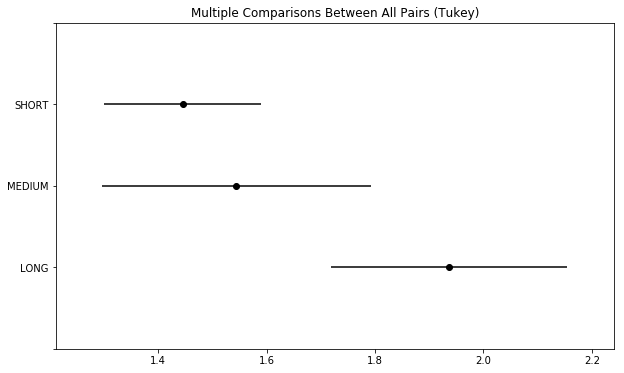

In [4]:
#CS FOR JOURNEY LENGTH

tukey_jl_c = pairwise_tukeyhsd(endog=df_jl_c['AVG_ACT'],     # Data
                          groups=df_jl_c['JOURNEY_LENGTH_GROUP'],   # Groups
                          alpha=0.05)          # Significance level

tukey_jl_c.plot_simultaneous()    # Plot group confidence intervals

tukey_jl_c.summary()              # See test summary

In [5]:
#CS FOR JOURNEY LENGTH

df_jl_c2 = """
    
    SELECT 
        JOURNEY_LENGTH_GROUP,
        COUNT(JOURNEY_ID) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_jl_c
        
        GROUP BY 
            JOURNEY_LENGTH_GROUP; """

df_jl_c3 = (ps.sqldf(df_jl_c2, locals()))
df_jl_c3.head(5)

,JOURNEY_LENGTH_GROUP,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,LONG,111,215,1.936937,0.020588
1,MEDIUM,90,139,1.544444,0.009417
2,SHORT,310,448,1.445161,0.000491


## Overall Latin America Average Marketing Attribution by JOURNEY STAGE in 2018 for Channel CS

In [6]:
#CS FOR JOUNREY STAGE

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_j = pd.io.sql.read_sql_query(
    """SELECT 
            JOURNEY_ID,
            ACTIVITY_TYPE,
            OPTY_BU,
            CHANNEL,
			JOURNEY_STAGE,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Content Syndication'
            AND OPTY_BU = 'Cloud and Data Platform'
            AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				JOURNEY_ID,
                ACTIVITY_TYPE,
                OPTY_BU,
				CHANNEL,
				JOURNEY_STAGE; """, con=cnxn)

cnxn.close()
df_j.head(5)

,JOURNEY_ID,ACTIVITY_TYPE,OPTY_BU,CHANNEL,JOURNEY_STAGE,ACT_CT,AVG_ATTR
0,2551982.0,INTERACTION,Cloud and Data Platform,Content Syndication,Late,1,0.072784
1,1883196.0,INTERACTION,Cloud and Data Platform,Content Syndication,Early,1,0.006585
2,3166151.0,INTERACTION,Cloud and Data Platform,Content Syndication,Early,1,0.005481
3,3361127.0,INTERACTION,Cloud and Data Platform,Content Syndication,Early,1,0.000139
4,2203999.0,INTERACTION,Cloud and Data Platform,Content Syndication,Middle,1,0.000108


### Tukey Test after Identifying Significance via One-Way Anova for Average Activities in 2018 by Journey Stage

In [7]:
#CS FOR JOURNEY STAGE

df_j_cl = """
    
    SELECT 
        JOURNEY_ID,
        JOURNEY_STAGE,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_j
        
        GROUP BY
            JOURNEY_ID,
            JOURNEY_STAGE; """

df_j_c = (ps.sqldf(df_j_cl, locals()))
df_j_c.head(5)

,JOURNEY_ID,JOURNEY_STAGE,TOT_ACT,AVG_ACT,ATTR
0,408525.0,Middle,1,1.0,-0.000183
1,553976.0,Early,1,1.0,-0.000979
2,571599.0,Middle,1,1.0,0.067073
3,845448.0,Early,3,3.0,-0.007164
4,1297756.0,Middle,2,2.0,0.072390


group1,group2,meandiff,lower,upper,reject
Early,Late,0.1935,-0.1231,0.5101,False
Early,Middle,0.0431,-0.2388,0.325,False
Late,Middle,-0.1504,-0.4262,0.1255,False


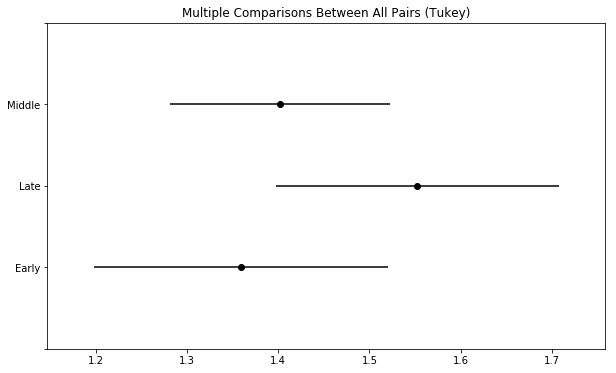

In [8]:
#CS FOR JOURNEY STAGE

tukey_j_c = pairwise_tukeyhsd(endog=df_j_c['AVG_ACT'],     # Data
                          groups=df_j_c['JOURNEY_STAGE'],   # Groups
                          alpha=0.05)          # Significance level

tukey_j_c.plot_simultaneous()    # Plot group confidence intervals

tukey_j_c.summary()              # See test summary

In [9]:
#CS FOR JOURNEY STAGE:  CLOUD

df_j_c2 = """
    
    SELECT 
        JOURNEY_STAGE,
        COUNT(JOURNEY_ID) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_j_c
        
        GROUP BY 
            JOURNEY_STAGE; """

df_j_c3 = (ps.sqldf(df_j_c2, locals()))
df_j_c3.head(5)

,JOURNEY_STAGE,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,Early,142,193,1.359155,0.008995
1,Late,152,236,1.552632,-0.012114
2,Middle,266,373,1.402256,0.014040


## Overall Latin America Average Marketing Attribution by CLIENT TYPE in 2018 for Channel CS

In [13]:
#CS FOR CLIENT TYPE

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_c = pd.io.sql.read_sql_query(
    """SELECT 
            JOURNEY_ID,
            ACTIVITY_TYPE,
            OPTY_BU,
            CHANNEL,
			CLIENT_TYPE,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Content Syndication'
            AND OPTY_BU = 'Cloud and Data Platform'
			AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				JOURNEY_ID,
                ACTIVITY_TYPE,
                OPTY_BU,
				CHANNEL,
				CLIENT_TYPE; """, con=cnxn)

cnxn.close()
df_c.head(5)

,JOURNEY_ID,ACTIVITY_TYPE,OPTY_BU,CHANNEL,CLIENT_TYPE,ACT_CT,AVG_ATTR
0,2196965.0,INTERACTION,Cloud and Data Platform,Content Syndication,E,1,0.000212
1,2001750.0,INTERACTION,Cloud and Data Platform,Content Syndication,E,1,0.000651
2,2551982.0,INTERACTION,Cloud and Data Platform,Content Syndication,C,1,0.072784
3,1883196.0,INTERACTION,Cloud and Data Platform,Content Syndication,C,1,0.006585
4,3166151.0,INTERACTION,Cloud and Data Platform,Content Syndication,C,1,0.005481


### Tukey Test after Identifying Significance via One-Way Anova for Average Activities in 2018 by Client Type

### CLOUD VISITS

In [14]:
#CS FOR CLIENT TYPE

df_c_c = """
    
    SELECT 
        JOURNEY_ID,
        CLIENT_TYPE,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_c
        
        GROUP BY 
            JOURNEY_ID, 
            CLIENT_TYPE; """

df_c_c = (ps.sqldf(df_c_c, locals()))
df_c_c.head(5)

,JOURNEY_ID,CLIENT_TYPE,TOT_ACT,AVG_ACT,ATTR
0,408525.0,E,1,1.0,-0.000183
1,553976.0,E,1,1.0,-0.000979
2,571599.0,C,1,1.0,0.067073
3,845448.0,C,3,3.0,-0.007164
4,1297756.0,C,2,2.0,0.072390


group1,group2,meandiff,lower,upper,reject
C,E,-0.2049,-0.5191,0.1092,False
C,I,-0.0881,-0.548,0.3718,False
E,I,0.1168,-0.3505,0.5841,False


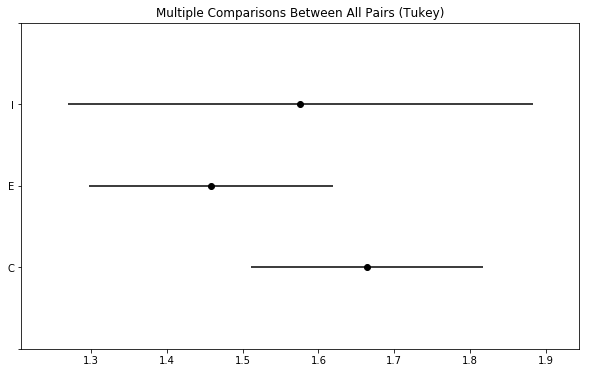

In [15]:
#CS FOR CLIENT TYPE

tukey_c_c = pairwise_tukeyhsd(endog=df_c_c['AVG_ACT'],     # Data
                          groups=df_c_c['CLIENT_TYPE'],   # Groups
                          alpha=0.05)          # Significance level

tukey_c_c.plot_simultaneous()    # Plot group confidence intervals

tukey_c_c.summary()              # See test summary

In [16]:
#CS FOR CLIENT TYPE

df_c_c2 = """
    
    SELECT 
        CLIENT_TYPE,
        COUNT(JOURNEY_ID) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_c_c
        
        GROUP BY 
            CLIENT_TYPE; """

df_c_c3 = (ps.sqldf(df_c_c2, locals()))
df_c_c3.head(5)

,CLIENT_TYPE,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,C,238,396,1.663866,0.010899
1,E,207,302,1.458937,0.002759
2,I,66,104,1.575758,0.001819


### CLOUD INTERACTIONS

## Overall Latin America Average Marketing Attribution by CLIENT FLAG in 2018 for Channel Email

In [17]:
#CS FOR CLIENT FLAG

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_f = pd.io.sql.read_sql_query(
    """SELECT 
            JOURNEY_ID,
            ACTIVITY_TYPE,
            OPTY_BU,
            CHANNEL,
			CLIENT_FLAG,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Content Syndication'
            AND OPTY_BU = 'Cloud and Data Platform'
			AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				JOURNEY_ID,
                ACTIVITY_TYPE,
                OPTY_BU,
				CHANNEL,
				CLIENT_FLAG; """, con=cnxn)

cnxn.close()
df_f.head(5)

,JOURNEY_ID,ACTIVITY_TYPE,OPTY_BU,CHANNEL,CLIENT_FLAG,ACT_CT,AVG_ATTR
0,1678207.0,INTERACTION,Cloud and Data Platform,Content Syndication,1,1,0.090359
1,2924403.0,INTERACTION,Cloud and Data Platform,Content Syndication,0,1,-0.004340
2,3094903.0,INTERACTION,Cloud and Data Platform,Content Syndication,1,5,-0.002758
3,3344725.0,INTERACTION,Cloud and Data Platform,Content Syndication,1,1,0.000282
4,1939630.0,INTERACTION,Cloud and Data Platform,Content Syndication,0,2,0.002725


In [50]:
#EMAIL INTERACTIONS FOR CLIENT FLAG

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_f_i = pd.io.sql.read_sql_query(
     """SELECT 
            JOURNEY_ID,
            ACTIVITY_TYPE,
            OPTY_BU,
            CHANNEL,
			CLIENT_FLAG,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Email'
            AND OPTY_BU = 'Cloud and Data Platform'
			--AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				JOURNEY_ID,
                ACTIVITY_TYPE,
                OPTY_BU,
				CHANNEL,
				CLIENT_FLAG; """, con=cnxn)

cnxn.close()
df_f_i.head(5)

,JOURNEY_ID,ACTIVITY_TYPE,OPTY_BU,CHANNEL,CLIENT_FLAG,ACT_CT,AVG_ATTR
0,2321965.0,INTERACTION,Cloud and Data Platform,Email,1,15,0.002733
1,2340399.0,INTERACTION,Cloud and Data Platform,Email,1,24,-0.000327
2,2343812.0,INTERACTION,Cloud and Data Platform,Email,1,1,-0.005150
3,2372550.0,INTERACTION,Cloud and Data Platform,Email,1,14,-0.009422
4,2498927.0,INTERACTION,Cloud and Data Platform,Email,1,6,-0.007968


### Tukey Test after Identifying Significance via One-Way Anova for Average Activities in 2018 by CLIENT FLAG

In [18]:
#CS FOR CLIENT FLAG

df_f_c = """
    
    SELECT 
        JOURNEY_ID,
        CLIENT_FLAG,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_f

        GROUP BY 
            JOURNEY_ID, 
            CLIENT_FLAG; """

df_f_c = (ps.sqldf(df_f_c, locals()))
df_f_c.head(5)

,JOURNEY_ID,CLIENT_FLAG,TOT_ACT,AVG_ACT,ATTR
0,408525.0,1,1,1.0,-0.000183
1,553976.0,1,1,1.0,-0.000979
2,571599.0,1,1,1.0,0.067073
3,845448.0,1,3,3.0,-0.007164
4,1297756.0,0,2,2.0,0.072390


In [19]:
#CS FOR CLIENT FLAG

ttest_f_cat1 = df_f_c[df_f_c['CLIENT_FLAG']==1]
ttest_f_cat2 = df_f_c[df_f_c['CLIENT_FLAG']==0]

ttest_ind(ttest_f_cat1['AVG_ACT'], ttest_f_cat2['AVG_ACT'])

Ttest_indResult(statistic=-1.1961350181348203, pvalue=0.23220076506043896)

In [20]:
#CS FOR CLIENT TYPE

df_f_c2 = """
    
    SELECT 
        CLIENT_FLAG,
        COUNT(JOURNEY_ID) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_f_c
        
        GROUP BY 
            CLIENT_FLAG; """

df_f_c3 = (ps.sqldf(df_f_c2, locals()))
df_f_c3.head(5)

,CLIENT_FLAG,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,0,92,159,1.728261,0.024563
1,1,419,643,1.534606,0.002447


## Overall Latin America Average Marketing Attribution by INDUSTRY in 2018 for Channel Email

In [22]:
#CS FOR INDUSTRY

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_i = pd.io.sql.read_sql_query(
    """SELECT 
            JOURNEY_ID,
            ACTIVITY_TYPE,
            OPTY_BU,
            CHANNEL,
			INDUSTRY,
            COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Content Syndication'
            AND OPTY_BU = 'Cloud and Data Platform'
			AND JOURNEY_ID NOT IN ('2219227','2285215','2178007','1740668','1812497','1566333','2680631','2074916','2123998','3697367','2261009','3173237','2806182','162065','1987694','3251753','2904433','3367491','2885076','2719374','2475044','2509893','2871373','3015727','1874256','2806184','3246463','1828795','1950468','2160467','2841538','1805978','1896996','2219149','1726237','1989716','2037995','2193612','2903472','2253941','2047978','1835911','2970004','1766040','2278371','3590264','2974398','2096473','2333547','3466321','2877105','2185891','3015725','3479273','3606253','1798943','2841543','1750868','1912627','2841540','3289367','1726232','1822452','2219175','1874258','1916887','2955799','3596811','2976803','2365966','3275796','3015678','3329483','3015729','1799211','2045218','3313612','2017508','2491148','3394756','2841539','3015681','3171663','3015677','3246465','2855561','1987693','3702984','2930043','3015724','2051917','2007031','1874257','1940558','3015680','2132515','3575523','2218819','3173238','2887257','2778739','3134578','3479274','3202930','2268944','3386068','2189473','3351573','1912945','1918473','2408177','3025348','3173234','3710361','3165255','2199726','1726191','2219174','2491145','3015731','2130085','2345758','2719370','1901913','1950344','1939088','3203999','3110517','1746506','3075340','1950469','2003630','1767358','1768192','2513594','1946231','2098951','3015730','2868604','2193221','1958799','1740669','1950467','3173236','2955902','356950','2106855','2866797','2959908','2081707','2780501','1991015','1797709','3710363','1933094','2491146','2228964','3483773','3705582','2864306','3167666','2026747','2872579','2250841','2034983','1987692','2183954','2920766','2189245','2233198','2927493','1825313','3110518','1827545','2033009','2145958','2160466','2349765','2841542','2680630','2114697','3015679','3697368','2251165','2360405','2484217','2250085','2645360','3417386','2111028','3167667','1740670','1982276','2189472','2204841','2268945','1749522','1943510','2923135','2106856','3328031','2191782','1746505','1939089','2862631','3283422','2883719','1798942','1884893','2059796','2193573','2778740','1930893','3015732','2702425','3015726','1726233','1763336','1822734','2155138','2904432','2984442','3204000','2123999','2132514','2630912','3015682','3483772','2719369','2918761','2967798','1756659','1932828','1951585','2936101','3173235','2491147','2878742','1920448','2074046','3551005','2160049','2292745','2405821','2155146','2843367','3112542','2169217','2841537','2891026','3622181','3710360','2900423','1906367','1946229','2868603','1816477','1894065','3006281','2224469','3443209','3015728','2271347','3710362','2351889','2112932','2235349','2840161','1793257','2906702','2915261','2930875','2160468')

            GROUP BY
				JOURNEY_ID,
                ACTIVITY_TYPE,
                OPTY_BU,
				CHANNEL,
				INDUSTRY; """, con=cnxn)

cnxn.close()
df_i.head(5)

,JOURNEY_ID,ACTIVITY_TYPE,OPTY_BU,CHANNEL,INDUSTRY,ACT_CT,AVG_ATTR
0,2551982.0,INTERACTION,Cloud and Data Platform,Content Syndication,Computer Services,1,0.072784
1,1883196.0,INTERACTION,Cloud and Data Platform,Content Syndication,Computer Services,1,0.006585
2,3166151.0,INTERACTION,Cloud and Data Platform,Content Syndication,Professional Services,1,0.005481
3,3361127.0,INTERACTION,Cloud and Data Platform,Content Syndication,Telecommunications,1,0.000139
4,2196965.0,INTERACTION,Cloud and Data Platform,Content Syndication,Retail,1,0.000212


In [23]:
#CS FOR INDUSTRY

df_i_c = """
    
    SELECT 
        JOURNEY_ID,
        INDUSTRY,
        SUM(ACT_CT) AS TOT_ACT,
        AVG(ACT_CT) AS AVG_ACT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_i
        WHERE INDUSTRY IS NOT NULL
        
        GROUP BY 
            JOURNEY_ID, 
            INDUSTRY; """

df_i_c = (ps.sqldf(df_i_c, locals()))
df_i_c.head(5)

,JOURNEY_ID,INDUSTRY,TOT_ACT,AVG_ACT,ATTR
0,408525.0,Banking,1,1.0,-0.000183
1,553976.0,Telecommunications,1,1.0,-0.000979
2,571599.0,Professional Services,1,1.0,0.067073
3,845448.0,Education,3,3.0,-0.007164
4,1297756.0,Computer Services,2,2.0,0.072390


group1,group2,meandiff,lower,upper,reject
Automotive,Banking,0.0224,-1.9584,2.0033,False
Automotive,Chemicals & Petroleum,-0.2521,-2.5289,2.0247,False
Automotive,Computer Services,0.127,-1.8802,2.1342,False
Automotive,Consumer Products,0.4464,-1.7313,2.6242,False
Automotive,Education,0.3571,-1.9897,2.704,False
Automotive,Electronics,-0.4286,-3.6062,2.7491,False
Automotive,Energy & Utilities,0.0159,-2.539,2.5708,False
Automotive,Exclusions,5.5714,0.1516,10.9912,True
Automotive,Financial Markets,0.4603,-2.0946,3.0152,False
Automotive,"Government, Central/Federal",0.5714,-1.9835,3.1263,False


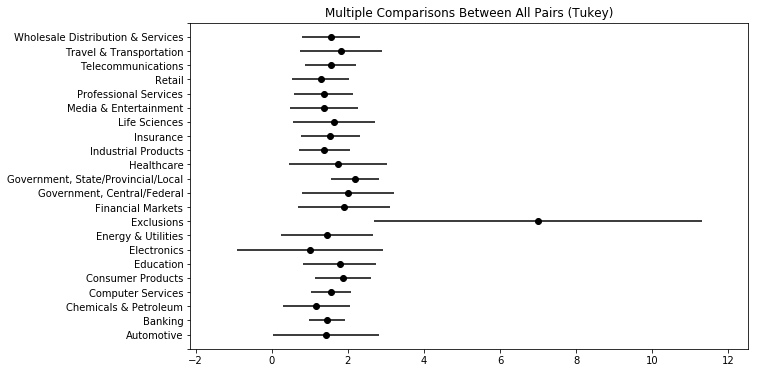

In [24]:
#CS FOR INDUSTRY

tukey_i_c = pairwise_tukeyhsd(endog=df_i_c['AVG_ACT'],     # Data
                          groups=df_i_c['INDUSTRY'],   # Groups
                          alpha=0.05)          # Significance level

tukey_i_c.plot_simultaneous()    # Plot group confidence intervals

tukey_i_c.summary()              # See test summary

In [25]:
#CSFOR INDUSTRY

df_i_c2 = """
    
    SELECT 
        INDUSTRY,
        COUNT(JOURNEY_ID) AS JOURNEYS,
        SUM(TOT_ACT) AS TOT_ACT,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(ATTR) AS ATTR
       
        FROM df_i_c
        
        GROUP BY 
            INDUSTRY; """

df_i_c3 = (ps.sqldf(df_i_c2, locals()))
df_i_c3.head(30)

,INDUSTRY,JOURNEYS,TOT_ACT,AVG_ACT,ATTR
0,Automotive,7,10,1.428571,0.036103
1,Banking,102,148,1.450980,0.001461
2,Chemicals & Petroleum,17,20,1.176471,-0.000689
3,Computer Services,72,112,1.555556,0.017986
4,Consumer Products,24,45,1.875000,0.017252
5,Education,14,25,1.785714,0.006809
6,Electronics,4,4,1.000000,0.011306
7,Energy & Utilities,9,13,1.444444,-0.026936
8,Exclusions,1,7,7.000000,-0.000452
9,Financial Markets,9,17,1.888889,-0.022319
